In [172]:
import cv2
import math
import matplotlib.pyplot as plt
import numpy as np

In [178]:
args = {'prototxt': 'deploy.prototxt.txt', 'model': 'res10_300x300_ssd_iter_140000.caffemodel', 'confidence': 0.7}
print("[INFO] loading model...")
net = cv2.dnn.readNetFromCaffe(args["prototxt"], args["model"])
# net = cv2.dnn.readNetFromTorch('nn4.small2.v1.t7')
image = cv2.imread("./images/protest5.jpg")
(h,w) = image.shape[:2]
if h > 2000 or w > 2000:
    blob = cv2.dnn.blobFromImage(image, mean=(104.0, 117.0, 123.0))
    args['confidence'] = 0.8
else:
    blob = cv2.dnn.blobFromImage(cv2.resize(image, (300, 300)), 1.0, (300, 300), (104.0, 117.0, 123.0))
    args['confidence'] = 0.7


[INFO] loading model...


In [179]:
print("[INFO] computing object detections...")
net.setInput(blob)
detections = net.forward()

[INFO] computing object detections...


In [180]:
# loop over the detections
for i in range(0, detections.shape[2]):
    # extract the confidence (i.e., probability) associated with the
    # prediction
    confidence = detections[0, 0, i, 2]

    # filter out weak detections by ensuring the `confidence` is
    # greater than the minimum confidence
    if confidence > args["confidence"]:
        # compute the (x, y)-coordinates of the bounding box for the
        # object
        box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
        (startX, startY, endX, endY) = box.astype("int")
        print(startX)
        # draw the bounding box of the face along with the associated
        # probability
        text = "{:.2f}%".format(confidence * 100)
        y = startY - 10 if startY - 10 > 10 else startY + 10
        cv2.rectangle(image, (startX, startY), (endX, endY),(0, 0, 255), 2)
        cv2.putText(image, text, (startX, y),cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 0, 255), 2)

1804
1095
2118
563
403
1431
1092
64
3371
61
918
350


Text(0.5, 1.0, 'Image')

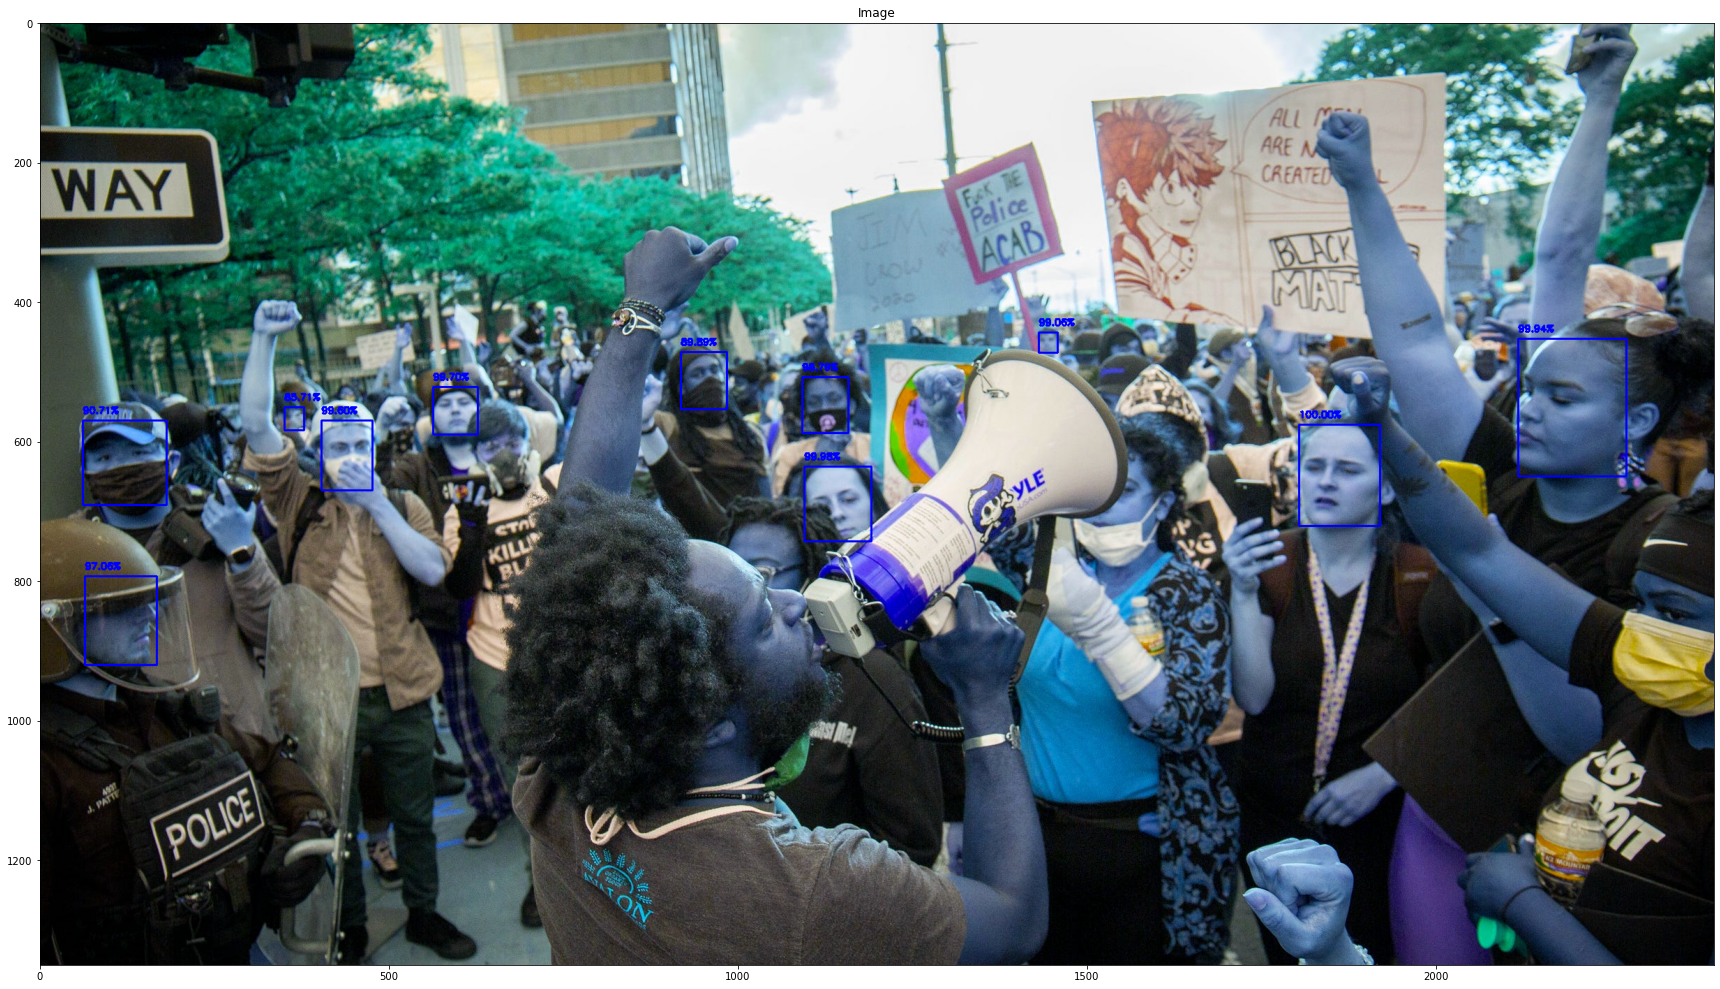

In [176]:
fig, ax1 = plt.subplots(1, figsize = (30, 30))
ax1.imshow(image)
ax1.set_title('Image')